**** About Dataset

 Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA

 You can get a quick introduction to this Dataset with this kernel: Dataset Walk-through

 Acknowledgements: Data provided by montcoalert.org

 columns name

 lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)

 Total shape (663522, 9)

 ****

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('/content/sample_data/911.csv')

In [5]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
df.shape

(663522, 9)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,663522.0,40.158162,0.220641,0.000000,40.100344,40.143927,40.229008,51.335390
lng,663522.0,-75.300105,1.672884,-119.698206,-75.392735,-75.305143,-75.211865,87.854975
zip,583323.0,19236.055791,298.222637,1104.000000,19038.000000,19401.000000,19446.000000,77316.000000
e,663522.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['zip'].value_counts().head(5)

,count
zip,
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464


In [10]:
# top 5 townships
df['twp'].value_counts().head(5)

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


In [11]:
df['title'].nunique()

148

In [12]:
df['title'].apply(lambda title: title.split(':')[0]).value_counts().head(5)

,count
title,
EMS,332692
Traffic,230208
Fire,100622


In [13]:
# creating new features
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [14]:
df['Reason'].value_counts()

,count
Reason,
EMS,332692
Traffic,230208
Fire,100622


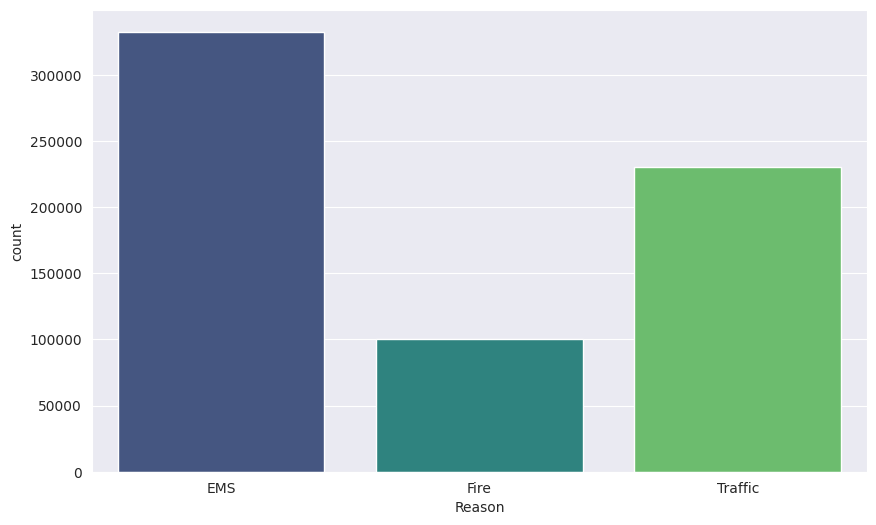

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Reason', data=df,palette='viridis')
plt.show()

In [16]:
# find the data type object in the timestamp
type(df['timeStamp'].iloc[0])

str

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [18]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [19]:
# using lambda function find the Hour , month , day of week


df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [20]:
# dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['day of week'] = df['day of week'].map(dmap)

In [22]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

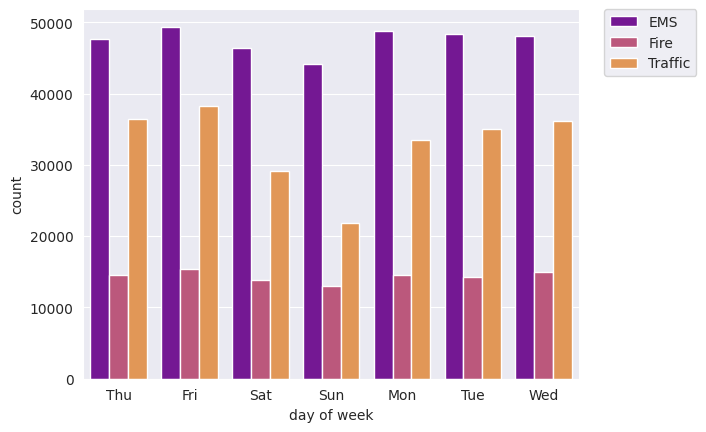

In [23]:
sns.countplot (x='day of week',data=df,hue='Reason',palette='plasma')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

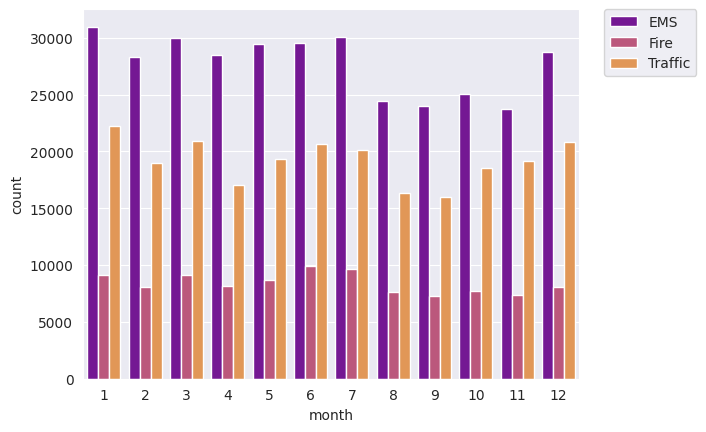

In [24]:
sns.countplot (x='month',data=df,hue='Reason',palette='plasma')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [25]:
bymoth = df.groupby('month').count()
bymoth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day of week
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


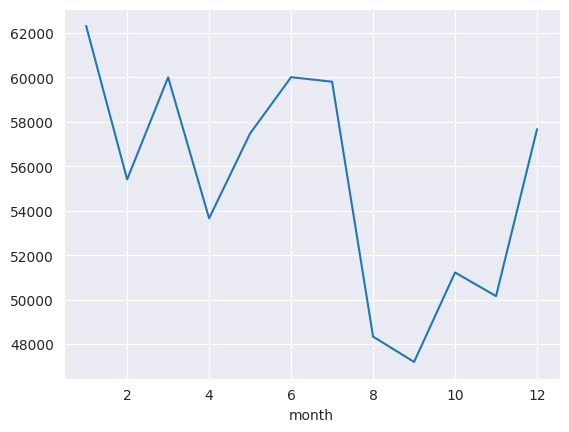

In [26]:
bymoth['twp'].plot()
plt.show()

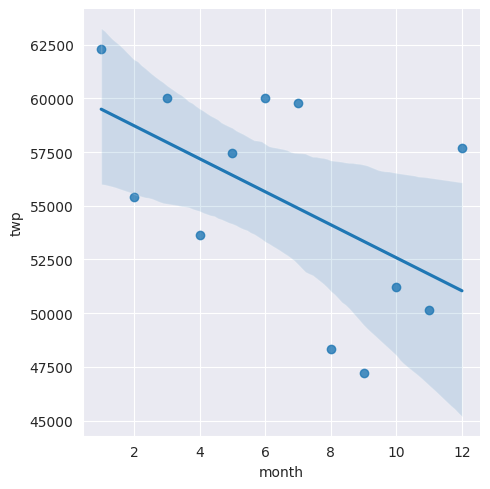

In [27]:
# create a linear fit on the number of calls per month.  and reset index
sns.lmplot(x='month',y='twp',data=bymoth.reset_index())
plt.show()

In [28]:
# create a New columns and timestamp
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

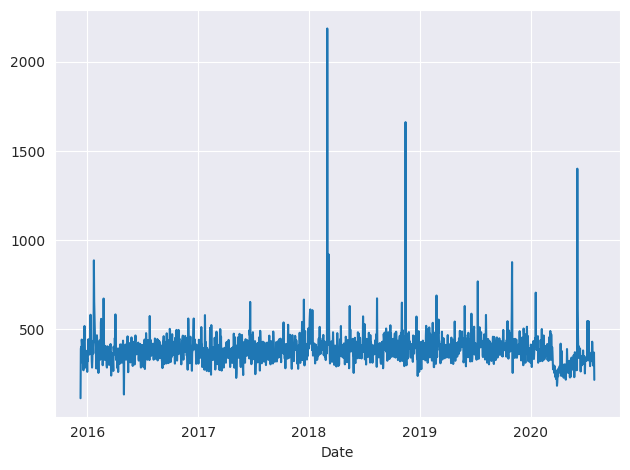

In [29]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.show()

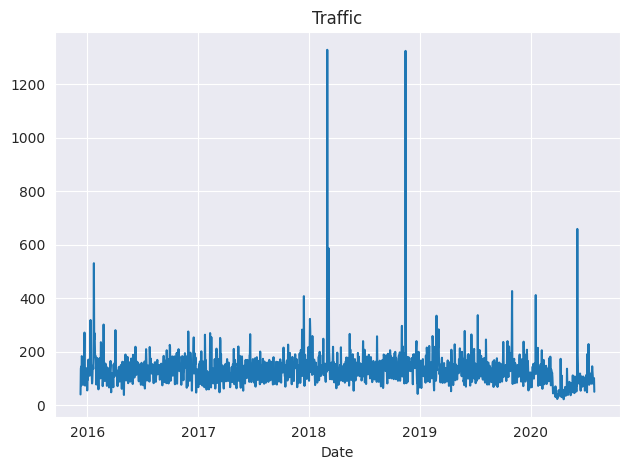

In [30]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.show()

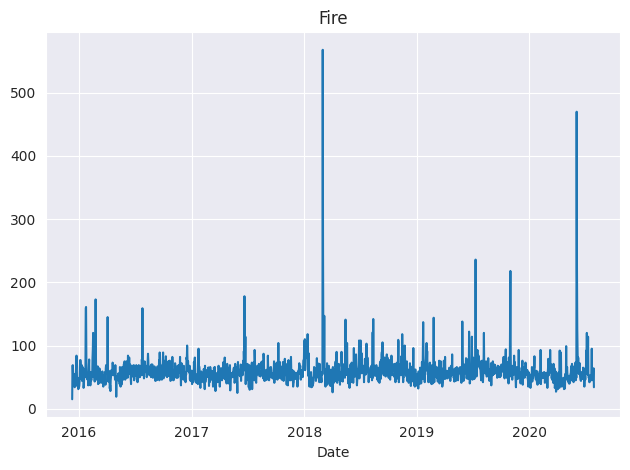

In [31]:
df[df["Reason"]== 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()
plt.show()

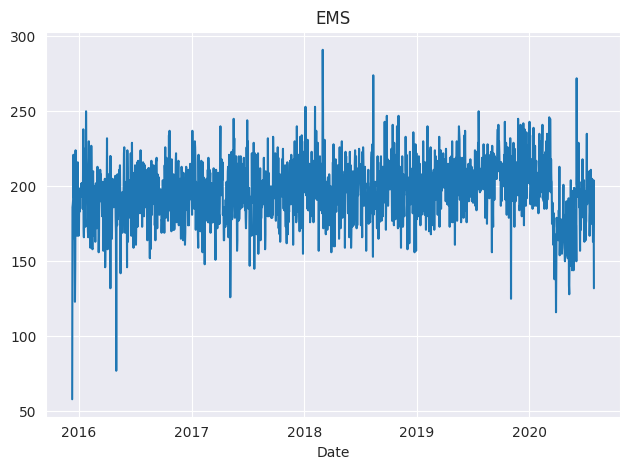

In [32]:
df[df['Reason']== 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
plt.show()

In [33]:
#  restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Wee

dayHour =df.groupby(by=['day of week', 'hour']).count()['Reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,5584,5843,5994,6181,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,5458,5632,5881,5664,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,4944,5450,5555,5378,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,4262,4438,4882,4654,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,5464,5492,5898,6173,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


In [34]:
month = df.groupby(by=['month','day of week']).count()['Reason'].unstack()
month.head()

day of week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
month,,,,,,,
1,9309,8896,8475,7478,9055,9714,9409
2,8255,8747,7593,6452,7997,8087,8296
3,10941,8060,8050,6766,8849,8372,8989
4,7997,8410,7514,6865,7722,7561,7602
5,8904,7881,7223,6694,8740,9026,9041


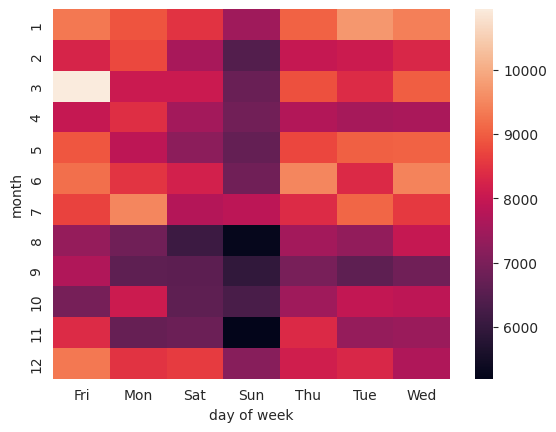

In [37]:
# heatmap month
sns.heatmap(month)
plt.show()

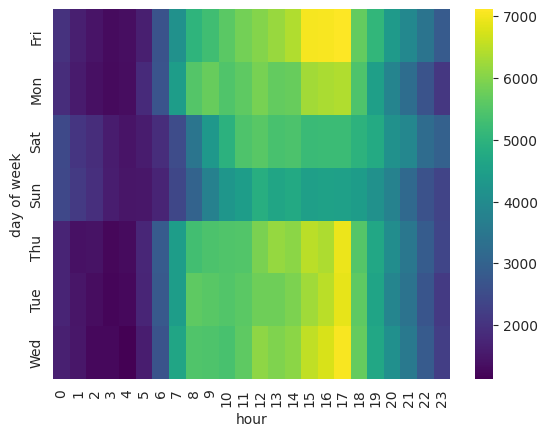

In [40]:
# heatmap for dayhour

sns.heatmap(dayHour,cmap='viridis')
plt.show()

In [35]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [36]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10
